In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
K = 4

## Load dataset
data_path = "../../../rings_10size"
Data = []
for i in range(10):
    data = torch.from_numpy(np.load(data_path + '/ob_%d.npy' % (((i+1)*10 + 20) * K))).float()
    Data.append(data)
D = 2
NUM_HIDDEN_LOCAL = 64
NUM_HIDDEN = 32
NUM_NSS = 8
CUDA = torch.cuda.is_available()
DEVICE = 1

RECON_SIGMA = torch.ones(1) * 0.3
RADI = torch.ones(1) * 2.0
lg2pi = torch.log(torch.ones(1) * 2 * math.pi)
PATH = 'ag-rings-%d' % 10


# Train_Params = (NUM_EPOCHS, SAMPLE_SIZE, BATCH_SIZE, CUDA, DEVICE, PATH)
# Model_Params = (K, D, MCMC_SIZE)

In [3]:
from load import *
models = init_models(K, D, NUM_HIDDEN, NUM_HIDDEN_LOCAL, NUM_NSS, RECON_SIGMA, CUDA, DEVICE, RESTORE=True, PATH=PATH)

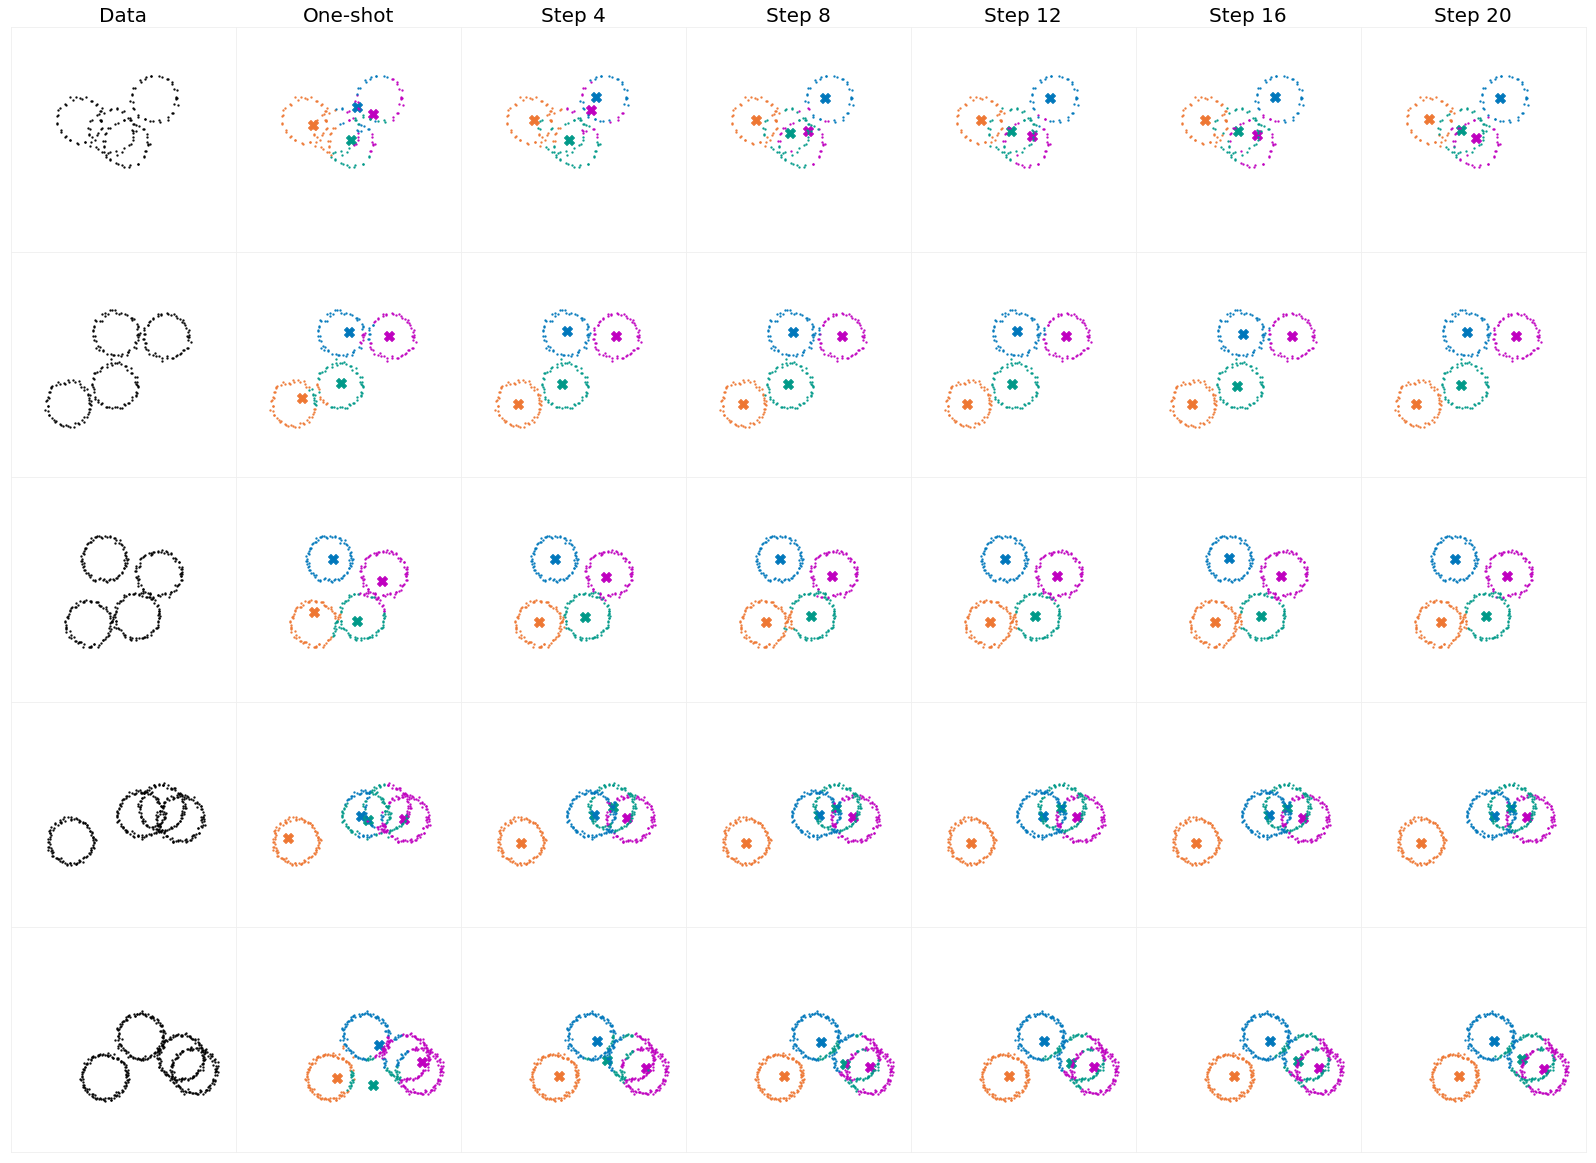

In [4]:
from plots_mc import *
BATCH_SIZE = 5
MCMC_STEPS = 20 ## 12 is maximum mcmc steps
VIS_INTERVAL = 4
FS = 25
TITLE_FS = 20
OB_MS = 2.0
MU_MARKER = 'X'
MU_MS = 100
OPACITY = 0.8
BOUND = 10
COLORS = ['#EE7733', 'm', '#0077BB', '#009988']
##
DATA_PTR = 5

plot_obj = Plot_MC(models, K, D, 1, BATCH_SIZE, MCMC_STEPS, VIS_INTERVAL, FS, TITLE_FS, OB_MS, MU_MARKER, MU_MS, OPACITY, BOUND, COLORS, CUDA, DEVICE)
plot_obj.plot_chains(Data, DATA_PTR)